## Ejercicio 6

Generar $n=100$ samples de $X_1 \sim  \mathcal{U}(0,1), Z\sim \mathcal{N}(0,0.01)$ y $\varepsilon\sim \mathcal{N}(0,1)$. A partir de estas muestras generar $X_2= 0.5X_1+Z$ y de $Y=2+2X_1+0.3X_2 + \varepsilon$

a. Calcular la correlación entre las muestras de $X_1$ y $X_2$ y graficar su distribución conjunta.  
b. Ajustar un modelo por mínimos cuadrados para predecir $Y$ usando como dato tanto $X_1$ como $X_2$. Describir los resultados obtenidos incluyendo los los coeficientes de regresión $\hat\beta_0, \hat\beta_1, \hat\beta_2$, y analizar la relación entre estos coeficientes y los verdaderos valores  $\beta_0, \beta_1, \beta_2$  
c. Ajustar modelos de regresión lineal por mínimos cuadrados para $Y$ y analizar resultados
  - utilizando solamente datos de $X_1$ e $Y$
  - utilizando solamente datos de $X_2$ e $Y$

d. Graficar la distribución conjunta de $\hat\beta_1$ y $\hat\beta_2$

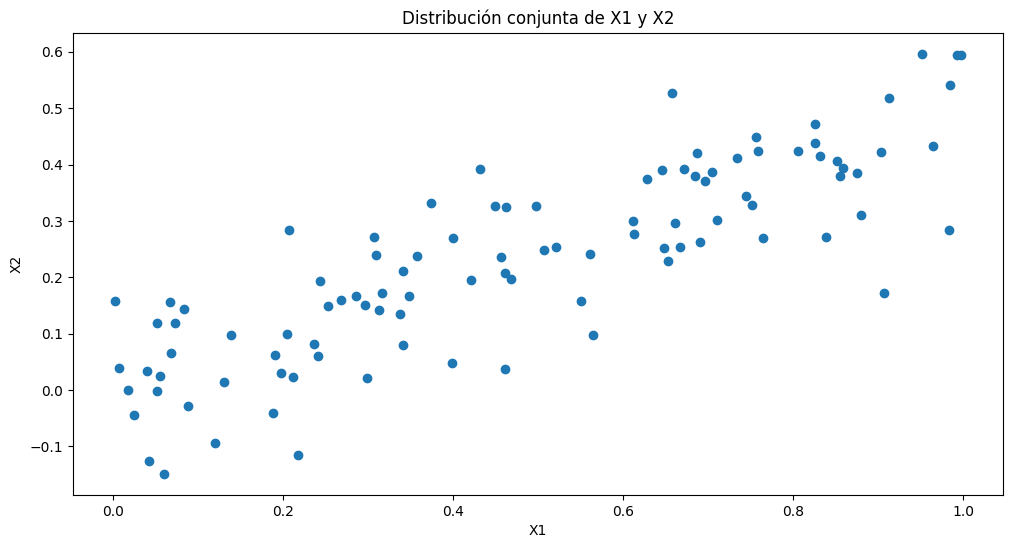

In [10]:
#6.a
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Número de muestras
n = 100

true_betas = [2,2,0.3]

# Generar X1, Z y epsilon
X1 = stats.uniform.rvs(0, 1, size=n)  # X1 ~ Uniform(0, 1)
Z = stats.norm.rvs(0, 0.1, size=n)    # Z ~ Normal(0, 0.1)
epsilon = stats.norm.rvs(0, 1, size=n) # epsilon ~ Normal(0, 1)

# Generar X2
X2 = 0.5 * X1 + Z

# Armar matriz de diseño
X = np.column_stack((np.ones(n),X1, X2))

# Generary y
y = X @ true_betas + epsilon

# 1. Calcular la correlación entre X1 y X2

correlation_matrix = np.corrcoef(X1, X2)
correlation_matrix[0,1]

# ... y graficar su distribución conjunta

fig, ax = plt.subplots(figsize = (12, 6))

ax.scatter(X1, X2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Distribución conjunta de X1 y X2')

plt.show()


In [11]:
#6.b
def get_beta_hat(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat =  get_beta_hat(X, y)

print(beta_hat.round(2))
print (true_betas)


[1.72 1.87 1.02]
[2, 2, 0.3]


In [12]:
#6.c
# ... solamente X1
design_x1 = np.column_stack((np.ones(n),X1))
beta_hat_x1 = get_beta_hat(design_x1, y)

print('Estimación utilizando solamente X1:')
print('Estimador:',beta_hat_x1[1].round(3))
print('Parámetro:',true_betas[1])

# ... solamente X2
design_x2 = np.column_stack((np.ones(n),X2))
beta_hat_x2 = get_beta_hat(design_x2, y)

print('Estimación utilizando solamente X2:')
print('Estimador:',beta_hat_x2[1].round(3))
print('Parámetro:',true_betas[1])


Estimación utilizando solamente X1:
Estimador: 2.369
Parámetro: 2
Estimación utilizando solamente X2:
Estimador: 3.748
Parámetro: 2


<>:33: SyntaxWarning: invalid escape sequence '\h'
<>:33: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_33814/1789131440.py:33: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Distribución Conjunta de $\hat{\\beta}_1$ y $\hat{\\beta}_2$')


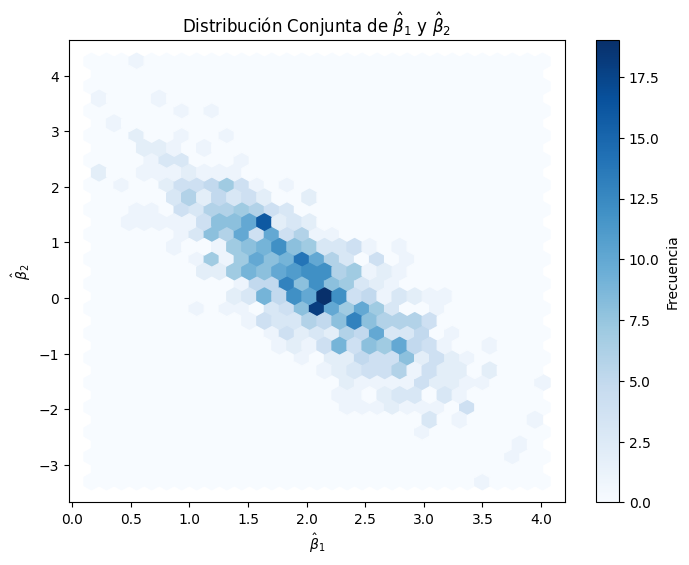

In [13]:
#6.d
# Graficar la distribución conjunta de beta_hat1 y beta_hat2

# Para esto vamos a realizar un ejercicio de simulación


# Número de repeticiones para la simulación
num_simulations = 1000

# Almacenar los coeficientes
beta1_estimates = []
beta2_estimates = []

for _ in range(num_simulations):

    # Generar error
    epsilon = stats.norm.rvs(0, 1, size=n) # epsilon ~ Normal(0, 1)

    # Generary y
    y = X @ true_betas + epsilon

    # Estimar por MCO
    beta_hat = get_beta_hat(X, y)

    # Almacenar coeficientes
    beta1_estimates.append(beta_hat[1])
    beta2_estimates.append(beta_hat[2])

# Graficar
plt.figure(figsize=(8, 6))
plt.hexbin(beta1_estimates, beta2_estimates, gridsize=30, cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Distribución Conjunta de $\hat{\\beta}_1$ y $\hat{\\beta}_2$')
plt.xlabel('$\\hat{\\beta}_1$')
plt.ylabel('$\\hat{\\beta}_2$')
plt.show()
